In [16]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

In [17]:
root = "aist_pos2s"
base_dir = "hand"

mode = "bi_70_145"
df_axis_z1 = pd.read_csv(f"./{root}/{base_dir}/{base_dir}_zero_{mode}.csv")

c = "a"
ref = df_axis_z1["music_tempo"].to_numpy()
tempo_x_z1 = df_axis_z1[f"X_{c}"].to_numpy()    # "X_{c}"
tempo_y_z1 = df_axis_z1[f"Y_{c}"].to_numpy()
tempo_mode_z1 = df_axis_z1[f"bpm_mode"].to_numpy()
tempo_median_z1 = df_axis_z1[f"bpm_median"].to_numpy()


### oe1 oe2 acc1 acc2 m3

In [18]:
# Data for each experiment
experiments = {
    "zero_uni": [tempo_x_z1, tempo_y_z1, tempo_mode_z1, tempo_median_z1],
    
}
axes = ["X", "Y", "mode", "median"]

# Initialize results storage
results = {"experiment": [], "axis": [], "acc1": [], "acc2": [], "acc3": [],
           "hits_idx": [], "hits_dbl_idx": [], "hits_hf_idx": []}

tolerance = 8
for exp_name, data in experiments.items():
    for axis_name, calculated in zip(axes, data):
        metrics, hits_idx, hits_dbl_idx, hits_hf_idx = calculate_metrics_with_oe(ref, calculated, tolerance = tolerance)
        
        results["experiment"].append(exp_name)
        results["axis"].append(axis_name)
        results["acc1"].append(metrics["acc1"])
        results["acc2"].append(metrics["acc2"]) # double/ half
        results["acc3"].append(metrics["acc3"]) # 1x 2x 3x 0.5x 0.33x
        
        results["hits_idx"].append(hits_idx.tolist())
        results["hits_dbl_idx"].append(hits_dbl_idx.tolist())
        results["hits_hf_idx"].append(hits_hf_idx.tolist())

results_df = pd.DataFrame(results)
results_df.to_csv(f'./{root}/{base_dir}/{base_dir}_{mode}_score.csv')

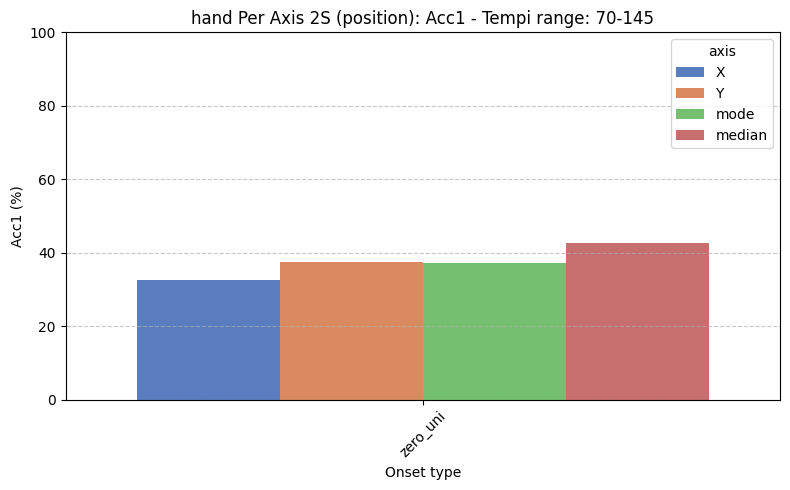

In [19]:
# Plot using Seaborn
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
sns.barplot(data=results_df, x="experiment", y="acc1", palette="muted", hue="axis")

#
plt.xlabel("Onset type")
plt.ylabel("Acc1 (%)")
plt.title(f"{base_dir} Per Axis 2S (position): Acc1 - Tempi range: 70-145")
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.ylim(0, 100)  # Set consistent y-axis limits
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
# plt.savefig(f'./{root}/{base_dir}/{base_dir}_acc1_70-145.png')
plt.show()

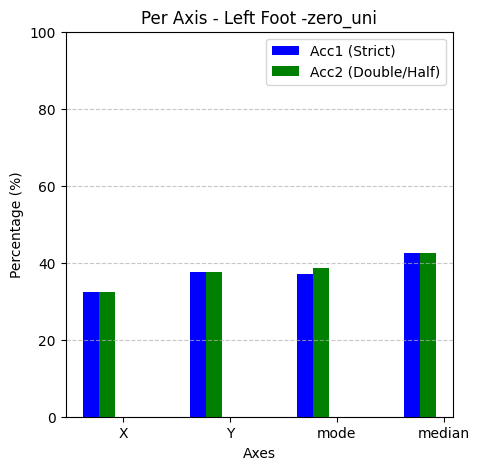

In [20]:
# Plot metrics for each experiment
for exp_name in results_df["experiment"].unique():
    exp_data = results_df[results_df["experiment"] == exp_name]
    
    x = np.arange(len(exp_data))  # Axes: X, Y, Z, XYZ
    bar_width = 0.15

    plt.figure(figsize=(5, 5))
    plt.bar(x - 2 * bar_width, exp_data["acc1"], bar_width, label="Acc1 (Strict)", color="blue")
    plt.bar(x - bar_width, exp_data["acc2"], bar_width, label="Acc2 (Double/Half)", color="green")
    # plt.bar(x, exp_data["Metric3"], bar_width, label="Metric3 (Subdivisions)", color="purple")
    # plt.bar(x + bar_width, exp_data["OE1"], bar_width, label="OE1 (Strict Overestimation)", color="orange")
    # plt.bar(x + 2 * bar_width, exp_data["OE2"], bar_width, label="OE2 (Hierarchical Overestimation)", color="red")



    plt.xticks(x, exp_data["axis"])
    plt.xlabel("Axes")
    plt.ylabel("Percentage (%)")
    plt.title(f"Per Axis - Left Foot -{exp_name}")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.ylim(0, 100)
    # plt.savefig(f'./plots/left_foot_{exp_name}.png')
    plt.show()